### Load library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('max_rows',20000)
pd.set_option('max_columns',30)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

In [2]:
df = pd.read_csv("combine.csv")

In [3]:
df.head()

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,Bachelors,Professional,M,M,1,0,0,2,137947,32
1,Bachelors,Professional,M,S,0,1,3,3,101141,33
2,Bachelors,Professional,M,M,1,1,3,3,91945,33
3,Bachelors,Professional,F,S,0,1,0,0,86688,30
4,Bachelors,Professional,F,S,1,4,5,5,92771,30


In [4]:
df.tail()

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
17014,Graduate Degree,Skilled Manual,F,S,0,0,0,0,97084,29
17015,Partial College,Management,F,S,0,4,4,4,110762,48
17016,Bachelors,Management,F,S,0,4,3,3,138097,61
17017,Partial College,Professional,F,M,1,1,0,2,101465,41
17018,High School,Skilled Manual,F,S,0,2,0,4,19108,51


In [5]:
df.shape

(17019, 10)

In [6]:
df.describe(include='all')

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
count,17019,17019,17019,17019,17019.000000,17019.000000,17019.000000,17019.000000,17019.000000,17019.000000
unique,5,5,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Bachelors,Professional,M,M,NaN,NaN,NaN,NaN,NaN,NaN
freq,4940,5109,8611,9199,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.673659,1.503672,0.996651,2.011575,78230.419237,36.457606
std,NaN,NaN,NaN,NaN,0.468888,1.138967,1.517687,1.683374,39741.839298,11.237482
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,9482.000000,18.000000
25%,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,47852.500000,28.000000
50%,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,2.000000,76274.000000,35.000000
75%,NaN,NaN,NaN,NaN,1.000000,2.000000,2.000000,3.000000,105253.000000,44.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17019 entries, 0 to 17018
Data columns (total 10 columns):
Education               17019 non-null object
Occupation              17019 non-null object
Gender                  17019 non-null object
MaritalStatus           17019 non-null object
HomeOwnerFlag           17019 non-null int64
NumberCarsOwned         17019 non-null int64
NumberChildrenAtHome    17019 non-null int64
TotalChildren           17019 non-null int64
YearlyIncome            17019 non-null int64
Age                     17019 non-null int64
dtypes: int64(6), object(4)
memory usage: 1.3+ MB


In [8]:
df_cat = df.select_dtypes(include='object')

In [9]:
df_cat.head()

,Education,Occupation,Gender,MaritalStatus
0,Bachelors,Professional,M,M
1,Bachelors,Professional,M,S
2,Bachelors,Professional,M,M
3,Bachelors,Professional,F,S
4,Bachelors,Professional,F,S


### Use LabelEncoder first

In [10]:
df_cat.columns

Index(['Education', 'Occupation', 'Gender', 'MaritalStatus'], dtype='object')

In [11]:
le = LabelEncoder()

In [12]:
#use df.apply() to apply le.fit_transform to all columns
cat2 = df_cat.apply(le.fit_transform)

In [13]:
cat2.head()

,Education,Occupation,Gender,MaritalStatus
0,0,3,1,0
1,0,3,1,1
2,0,3,1,0
3,0,3,0,1
4,0,3,0,1


### Use OneHot Encoding

In [14]:
enc = OneHotEncoder(drop='first')

In [15]:
enc.fit(cat2)

OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [16]:
onehotlabels = enc.transform(cat2).toarray()

In [17]:
onehotlabels.shape

(17019, 10)

In [18]:
onehotlabels

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 1.]])

In [19]:
cat3 = pd.DataFrame(onehotlabels)

In [20]:
cat3.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [21]:
df2 = pd.concat([cat3,df],axis=1)

In [22]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Bachelors,Professional,M,M,1,0,0,2,137947,32
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,Bachelors,Professional,M,S,0,1,3,3,101141,33
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Bachelors,Professional,M,M,1,1,3,3,91945,33
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Bachelors,Professional,F,S,0,1,0,0,86688,30
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Bachelors,Professional,F,S,1,4,5,5,92771,30


In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17019 entries, 0 to 17018
Data columns (total 20 columns):
0                       17019 non-null float64
1                       17019 non-null float64
2                       17019 non-null float64
3                       17019 non-null float64
4                       17019 non-null float64
5                       17019 non-null float64
6                       17019 non-null float64
7                       17019 non-null float64
8                       17019 non-null float64
9                       17019 non-null float64
Education               17019 non-null object
Occupation              17019 non-null object
Gender                  17019 non-null object
MaritalStatus           17019 non-null object
HomeOwnerFlag           17019 non-null int64
NumberCarsOwned         17019 non-null int64
NumberChildrenAtHome    17019 non-null int64
TotalChildren           17019 non-null int64
YearlyIncome            17019 non-null int64
Age         

In [24]:
df2 = df2.drop(['Education','Occupation','Gender','MaritalStatus'],axis=1)

In [25]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0,0,2,137947,32
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0,1,3,3,101141,33
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1,3,3,91945,33
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0,0,86688,30
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,4,5,5,92771,30


In [27]:
df2.columns = ['0','1','2','3','4','5','6','7','Gender','MaritalStatus',
               'HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome',
               'TotalChildren','YearlyIncome','Age']

In [28]:
df2.head()

,0,1,2,3,4,5,6,7,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0,0,2,137947,32
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0,1,3,3,101141,33
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1,3,3,91945,33
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0,0,86688,30
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,4,5,5,92771,30


In [29]:
#Save first, then overwrite later in a csv file
#df2.to_csv("transform.csv",index=False)

### Check distribution plot for non-binaries

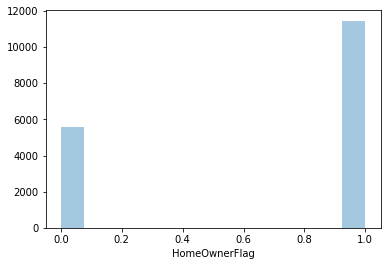

In [32]:
sns.distplot(a=df2.HomeOwnerFlag,kde=False)
plt.show()

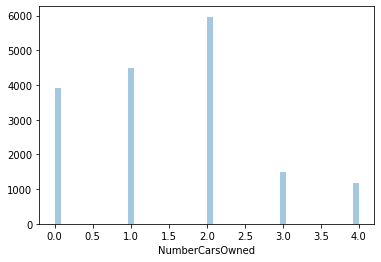

In [33]:
sns.distplot(a=df2.NumberCarsOwned,kde=False)
plt.show()

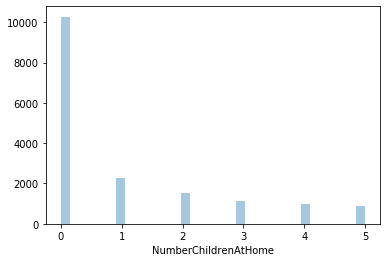

In [34]:
sns.distplot(a=df2.NumberChildrenAtHome,kde=False)
plt.show()

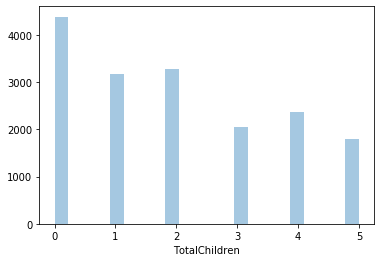

In [35]:
sns.distplot(a=df2.TotalChildren,kde=False)
plt.show()

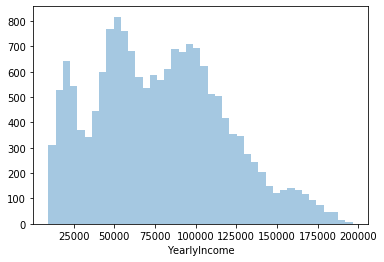

In [36]:
sns.distplot(a=df2.YearlyIncome,kde=False)
plt.show()

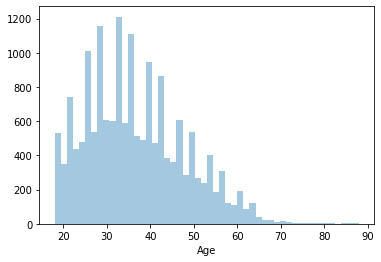

In [37]:
sns.distplot(a=df2.Age,kde=False)
plt.show()

### Use StandardScaler for non binaries features

In [39]:
X_scale = df2[['NumberCarsOwned','NumberChildrenAtHome','TotalChildren','YearlyIncome','Age']]

In [40]:
X_scale.head()

,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,0,0,2,137947,32
1,1,3,3,101141,33
2,1,3,3,91945,33
3,1,0,0,86688,30
4,4,5,5,92771,30


In [41]:
X_scale.shape

(17019, 5)

In [42]:
scaler = StandardScaler()

In [43]:
X_new = scaler.fit_transform(X_scale)

In [45]:
X_new

array([[-1.3202462 , -0.65670996, -0.00687645,  1.50265655, -0.39668469],
       [-0.44223166,  1.32004045,  0.58718608,  0.5765021 , -0.30769417],
       [-0.44223166,  1.32004045,  0.58718608,  0.34510189, -0.30769417],
       ...,
       [ 2.19181195,  1.32004045,  0.58718608,  1.50643102,  2.18404038],
       [-0.44223166, -0.65670996, -0.00687645,  0.58465496,  0.40422998],
       [ 0.43578288, -0.65670996,  1.18124862, -1.48770558,  1.29413518]])

In [46]:
X_new = pd.DataFrame(X_new,columns=X_scale.columns)

In [47]:
X_new.head()

,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,-1.320246,-0.656710,-0.006876,1.502657,-0.396685
1,-0.442232,1.320040,0.587186,0.576502,-0.307694
2,-0.442232,1.320040,0.587186,0.345102,-0.307694
3,-0.442232,-0.656710,-1.195002,0.212819,-0.574666
4,2.191812,2.637874,1.775311,0.365887,-0.574666


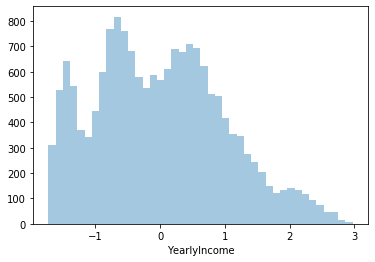

In [48]:
sns.distplot(a=X_new.YearlyIncome,kde=False)
plt.show()

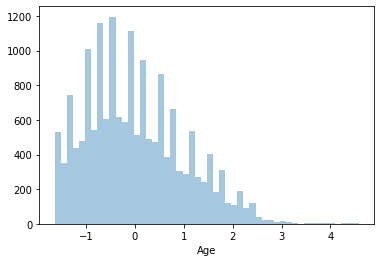

In [49]:
sns.distplot(a=X_new.Age,kde=False)
plt.show()

In [50]:
df2.head()

,0,1,2,3,4,5,6,7,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0,0,2,137947,32
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0,1,3,3,101141,33
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1,3,3,91945,33
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0,0,86688,30
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,4,5,5,92771,30


In [53]:
df2 = df2.drop(['NumberCarsOwned','NumberChildrenAtHome','TotalChildren','YearlyIncome','Age'],axis=1)

In [54]:
df2.head()

,0,1,2,3,4,5,6,7,Gender,MaritalStatus,HomeOwnerFlag
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


In [55]:
df3 = pd.concat([df2,X_new],axis=1)

In [56]:
df3.head()

,0,1,2,3,4,5,6,7,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,-1.320246,-0.656710,-0.006876,1.502657,-0.396685
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0,-0.442232,1.320040,0.587186,0.576502,-0.307694
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,-0.442232,1.320040,0.587186,0.345102,-0.307694
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,-0.442232,-0.656710,-1.195002,0.212819,-0.574666
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,2.191812,2.637874,1.775311,0.365887,-0.574666


In [57]:
df3.shape

(17019, 16)

In [58]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17019 entries, 0 to 17018
Data columns (total 16 columns):
0                       17019 non-null float64
1                       17019 non-null float64
2                       17019 non-null float64
3                       17019 non-null float64
4                       17019 non-null float64
5                       17019 non-null float64
6                       17019 non-null float64
7                       17019 non-null float64
Gender                  17019 non-null float64
MaritalStatus           17019 non-null float64
HomeOwnerFlag           17019 non-null int64
NumberCarsOwned         17019 non-null float64
NumberChildrenAtHome    17019 non-null float64
TotalChildren           17019 non-null float64
YearlyIncome            17019 non-null float64
Age                     17019 non-null float64
dtypes: float64(15), int64(1)
memory usage: 2.1 MB


In [59]:
#Save again in a csv file
#df3.to_csv("cleaned.csv",index=False)